In [1]:
import matplotlib.pyplot as plt
import os, sys

from astropy.io import fits
from astropy.table import Table

import numpy as np

import matplotlib.colors as colors
from astropy.visualization import imshow_norm, MinMaxInterval, LogStretch,PercentileInterval, ImageNormalize

import sep
sys.path.append(os.path.expanduser('~/repos/ReipurthBallyProject/src'))
from catalog import *
import sep

In [2]:
obsdir = '/home/kevin/Documents/HH24'
frameid = '2024_03_15_F164N_reg'
with fits.open(os.path.join(obsdir,'registered', frameid+'.fits')) as f:
#with fits.open(os.path.join(obsdir,'lucy-richardson', frameid+'_lr15.fits')) as f:
    print(f'Length: {len(f)}')
    for i,hdr in enumerate(f):
        xt = hdr.header.pop('XTENSION','Unknown')
        xn = hdr.header.pop('EXTNAME', 'Unknown')
        rn = hdr.header.pop('ROOTNAME', 'Unknown')
        radesys = hdr.header.pop('RADESYS', 'Unknown')
        print(f'Index: {i}, Extension: {xt}, Rootname: {rn}, Extname: {xn}, RADESYS: {radesys}')
    hdr = f[0].header.copy()
    img = f[0].data.copy()

Length: 1
Index: 0, Extension: Unknown, Rootname: Unknown, Extname: Unknown, RADESYS: ICRS


In [3]:
# fig, ax = plt.subplots(figsize=(9,6))
# ax.imshow(img, origin='lower',norm=colors.LogNorm(), cmap=plt.cm.gray_r)

In [9]:
img_cropped = img[:,:6000].astype(np.float32)

In [10]:
img_cropped.dtype

dtype('float32')

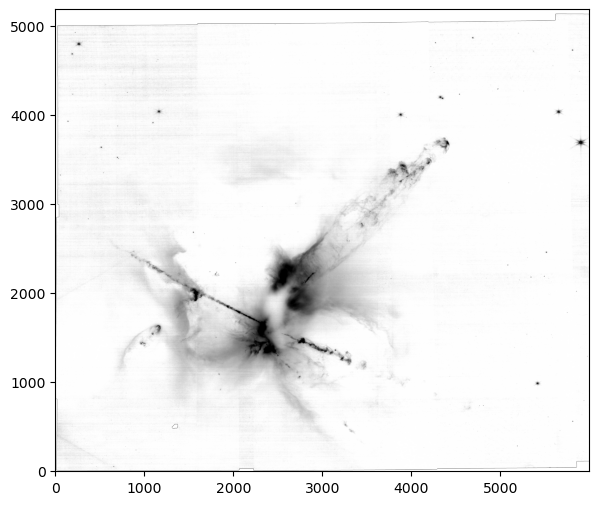

In [11]:
fig, ax = plt.subplots(figsize=(9,6))
ax.imshow(img_cropped, origin='lower',norm=colors.LogNorm(vmin=0.75, vmax=8.0), cmap=plt.cm.gray_r)

In [21]:
from scipy import ndimage
img_rot = ndimage.rotate(img_cropped, 65, reshape=False)

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
ax.imshow(img_rot, origin='lower',norm=colors.LogNorm(vmin=0.75, vmax=8.0), cmap=plt.cm.gray_r)
ax.axvline([1900,2200])
ax.axhline([2700, 4600])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
img_cropped.nbytes

124584000

In [15]:
img_cropped.shape

(5191, 6000)